### Imports

In [1]:
import numpy as np
import numpy.matlib as matl
from sklearn import mixture
from sklearn import cluster
from matplotlib.colors import ListedColormap
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

### Funciones para crear los datos y para dibujar

In [2]:
def rota_datos_alrededor_origen(X, angulo):
    angle_rad = angulo*2.0*np.pi/360.0

    s = np.sin(angle_rad)
    c = np.cos(angle_rad)
    matriz_rotacion = np.array([[c,-s],[s,c]])
    X_rotados = np.dot(matriz_rotacion, X) # se rotan los puntos generados

    return X_rotados

In [3]:
def genera_puntos_gausiana2D(Npuntos, media, var1, var2, angulo, display):
    X = np.random.randn(2, Npuntos)
    X[0,:] = X[0,:] * np.sqrt(var1) # se multiplica cada atributo por la
    X[1,:] = X[1,:] * np.sqrt(var2) # raiz cuadrada de la varianza deseada

    X = rota_datos_alrededor_origen(X, angulo)

    X[0,:] = media[0] + X[0,:]
    X[1,:] = media[1] + X[1,:]

    # Display
    if display:
        plt.figure(1)
        plt.plot(X[0,:],X[1,:],'bo',zorder=1)
        plt.grid(True)
        plt.axis('equal')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

    return X

### Generación de los datos del problema:

In [4]:
# Number of samples per component:
n_samples = 200

# Generate random sample, three components:
X1 = genera_puntos_gausiana2D(n_samples, [0, 0], 1, 1, 45, False)
X2 = genera_puntos_gausiana2D(n_samples, [10, 0], 8, 1, 45, False)
X3 = genera_puntos_gausiana2D(n_samples, [5, 5], 4, 1, 0, False)
X = np.concatenate((X1, X2, X3), axis=1).transpose()

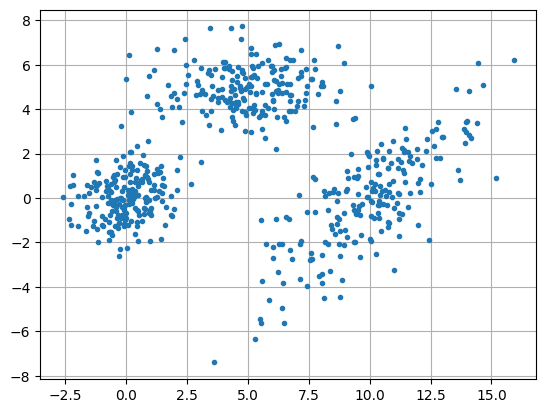

In [5]:
plt.figure()
plt.plot(X[:, 0], X[:, 1], '.')
plt.grid(True)
plt.show()

### Estimación de densidades mediante histogramas

(usando sólo la primera componente)

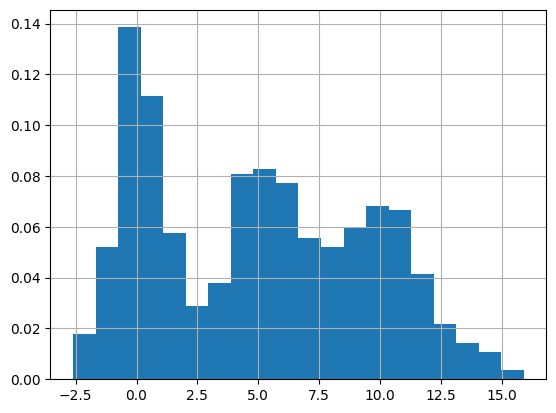

In [12]:
nbins = 20
x = X[:, 0]

plt.figure()
h, edges, _ = plt.hist(x, bins=nbins, density=True)
plt.grid(True)
plt.show()

El área del histograma es 1 (``density=True``):

In [7]:
np.diff(edges)[0]*h.sum()

0.9999999999999998

### Estimación de densidades mediante kernels

In [13]:
from sklearn.neighbors import KernelDensity

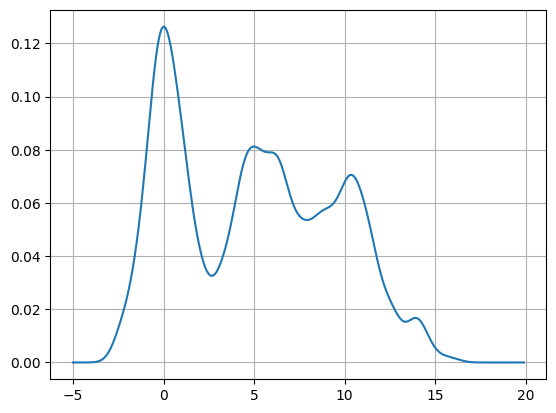

In [14]:
bw = 0.5
kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(x[:, None])

x_plot = np.arange(-5, 20, 0.1)[:, None]
log_dens = kde.score_samples(x_plot)

plt.figure()
plt.plot(x_plot, np.exp(log_dens))
plt.grid(True)
plt.show()

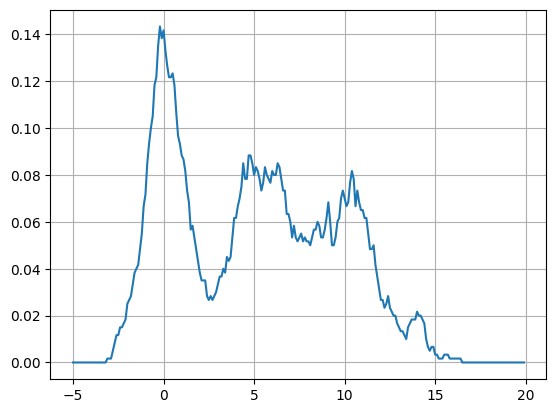

In [17]:
bw = 0.5
kde = KernelDensity(kernel='tophat', bandwidth=bw).fit(x[:, None])

x_plot = np.arange(-5, 20, 0.1)[:, None]
log_dens = kde.score_samples(x_plot)

plt.figure()
plt.plot(x_plot, np.exp(log_dens))
plt.grid(True)
plt.show()

### Estimación de densidades mediante el algoritmo EM

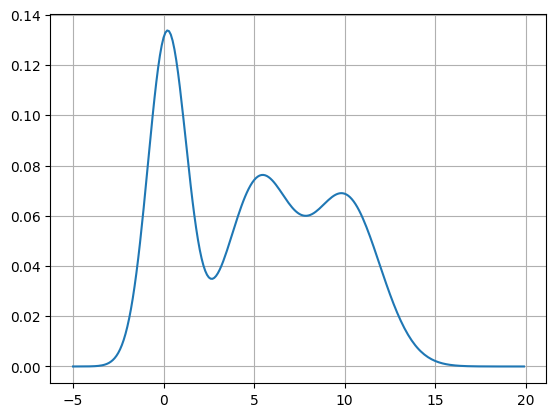

In [ ]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(x[:, None])

x_plot = np.arange(-5, 20, 0.1)[:, None]
log_dens = gmm.score_samples(x_plot)

plt.figure()
plt.plot(x_plot, np.exp(log_dens))
plt.grid(True)
plt.show()

### Usando todas las componentes:

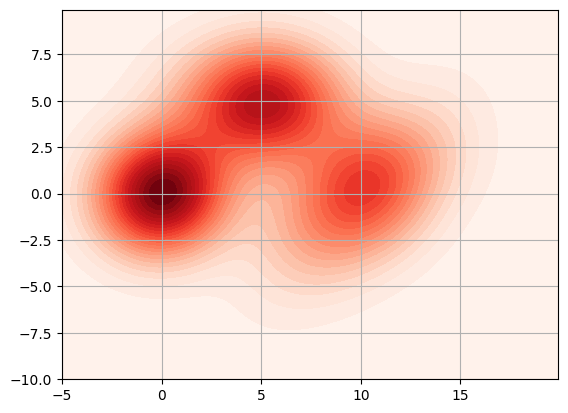

In [18]:
bw = 2.0
kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(X)

xx, yy = np.meshgrid(np.arange(-5, 20, 0.1), np.arange(-10, 10, 0.1))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
log_dens = kde.score_samples(xy)
zz = np.exp(log_dens).reshape(xx.shape)
levels = np.linspace(0, zz.max(), 25)

plt.figure()
plt.contourf(xx, yy, zz, levels=levels, cmap=plt.cm.Reds)
plt.grid(True)
plt.show()

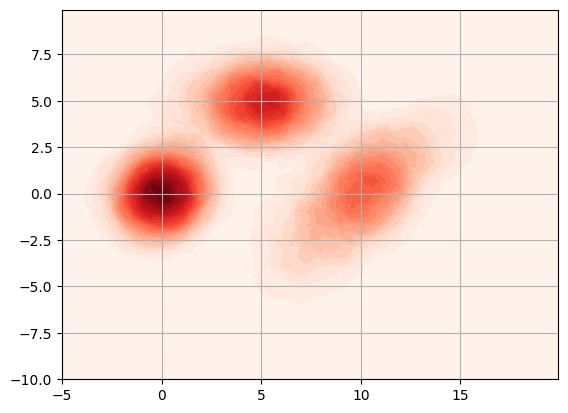

In [19]:
bw = 2.0
kde = KernelDensity(kernel='tophat', bandwidth=bw).fit(X)

xx, yy = np.meshgrid(np.arange(-5, 20, 0.1), np.arange(-10, 10, 0.1))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
log_dens = kde.score_samples(xy)
zz = np.exp(log_dens).reshape(xx.shape)
levels = np.linspace(0, zz.max(), 25)

plt.figure()
plt.contourf(xx, yy, zz, levels=levels, cmap=plt.cm.Reds)
plt.grid(True)
plt.show()

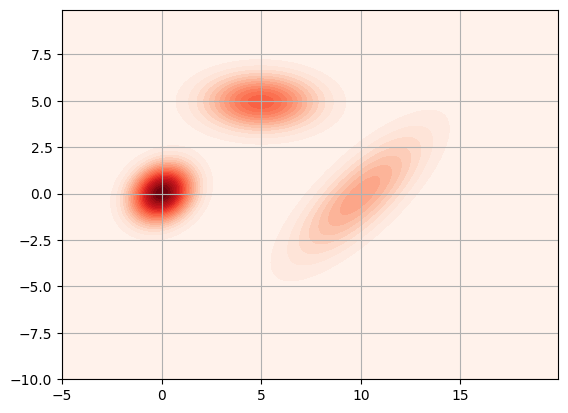

In [20]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

xx, yy = np.meshgrid(np.arange(-5, 20, 0.1), np.arange(-10, 10, 0.1))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
log_dens = gmm.score_samples(xy)
zz = np.exp(log_dens).reshape(xx.shape)
levels = np.linspace(0, zz.max(), 25)

plt.figure()
plt.contourf(xx, yy, zz, levels=levels, cmap=plt.cm.Reds)
plt.grid(True)
plt.show()

### Clasificación bayesiana con el problema del Iris

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df['target_num'] = iris.target
df[::10].head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,0
40,5.0,3.5,1.3,0.3,setosa,0
50,7.0,3.2,4.7,1.4,versicolor,1
60,5.0,2.0,3.5,1.0,versicolor,1
70,5.9,3.2,4.8,1.8,versicolor,1
80,5.5,2.4,3.8,1.1,versicolor,1
90,5.5,2.6,4.4,1.2,versicolor,1


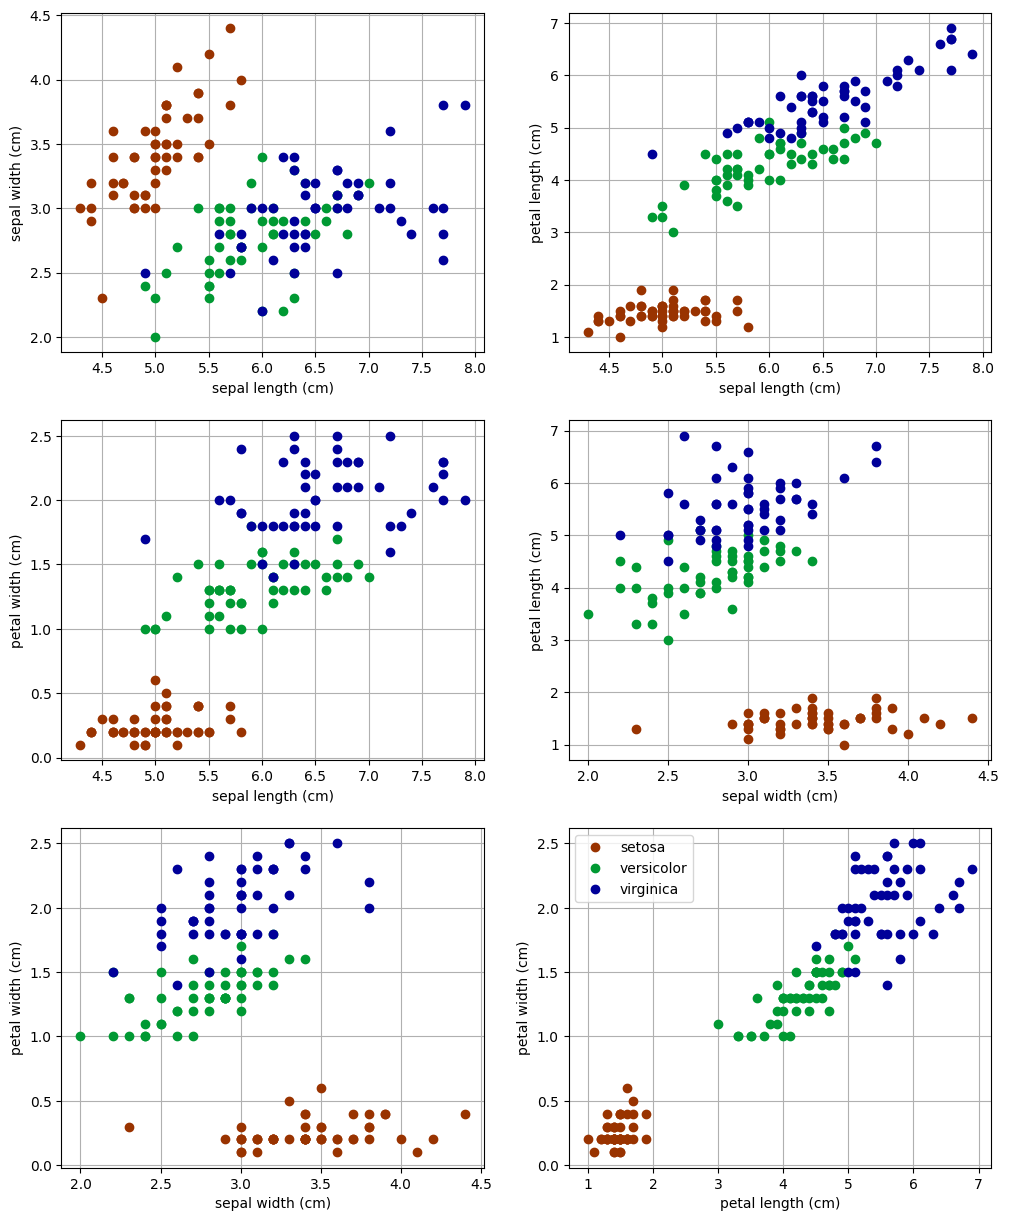

In [ ]:
plt.figure(figsize=(12,15))
n_classes = 3

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    plt.subplot(3, 2, pairidx + 1)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.grid(True)

    plt.plot(X[y==0,0], X[y==0,1], 'o', label=iris.target_names[0], color='#993300')
    plt.plot(X[y==1,0], X[y==1,1], 'o', label=iris.target_names[1], color='#009933')
    plt.plot(X[y==2,0], X[y==2,1], 'o', label=iris.target_names[2], color='#000099')

plt.legend(loc=2)
plt.show()

Elegimos sólo una pareja de atributos:

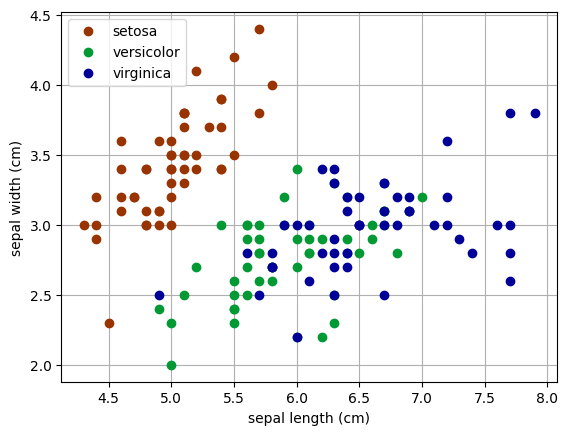

In [ ]:
n_classes = 3

pair = [0, 1]
X = iris.data[:, pair]
y = iris.target

plt.figure()
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.grid(True)

plt.plot(X[y==0,0], X[y==0,1], 'o', label=iris.target_names[0], color='#993300')
plt.plot(X[y==1,0], X[y==1,1], 'o', label=iris.target_names[1], color='#009933')
plt.plot(X[y==2,0], X[y==2,1], 'o', label=iris.target_names[2], color='#000099')

plt.legend(loc=2)
plt.show()

Aproximamos cada clase con una única componente gausiana:

In [ ]:
gmm0 = mixture.GaussianMixture(n_components=1, covariance_type='full')
gmm0.fit(X[y==0, :])
gmm1 = mixture.GaussianMixture(n_components=1, covariance_type='full')
gmm1.fit(X[y==1, :])
gmm2 = mixture.GaussianMixture(n_components=1, covariance_type='full')
gmm2.fit(X[y==2, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.1), np.arange(1.5, 4.5, 0.1))
xy = np.vstack([xx.ravel(), yy.ravel()]).T

px0 = np.exp(gmm0.score_samples(xy))
px1 = np.exp(gmm1.score_samples(xy))
px2 = np.exp(gmm2.score_samples(xy))
psum = px0 + px1 + px2 + 1.e-20

p0x = px0 / psum
p1x = px1 / psum
p2x = px2 / psum

Y dibujamos la probabilidad de cada clase:

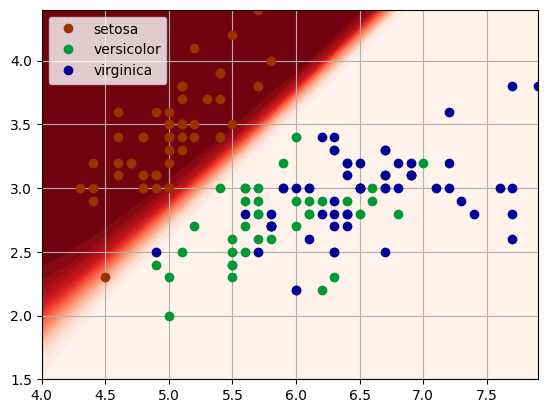

In [ ]:
# Probabilidad de clase 0:
zz = p0x.reshape(xx.shape)
levels = np.linspace(0, zz.max(), 25)

plt.figure()
plt.contourf(xx, yy, zz, levels=levels, cmap=plt.cm.Reds)
plt.plot(X[y==0,0], X[y==0,1], 'o', label=iris.target_names[0], color='#993300')
plt.plot(X[y==1,0], X[y==1,1], 'o', label=iris.target_names[1], color='#009933')
plt.plot(X[y==2,0], X[y==2,1], 'o', label=iris.target_names[2], color='#000099')

plt.legend(loc=2)

plt.grid(True)
plt.show()

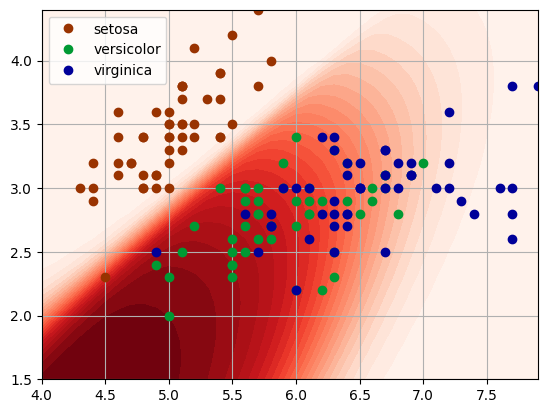

In [ ]:
# Probabilidad de clase 1
zz = p1x.reshape(xx.shape)
levels = np.linspace(0, zz.max(), 25)

plt.figure()
plt.contourf(xx, yy, zz, levels=levels, cmap=plt.cm.Reds)
plt.plot(X[y==0,0], X[y==0,1], 'o', label=iris.target_names[0], color='#993300')
plt.plot(X[y==1,0], X[y==1,1], 'o', label=iris.target_names[1], color='#009933')
plt.plot(X[y==2,0], X[y==2,1], 'o', label=iris.target_names[2], color='#000099')

plt.legend(loc=2)

plt.grid(True)
plt.show()

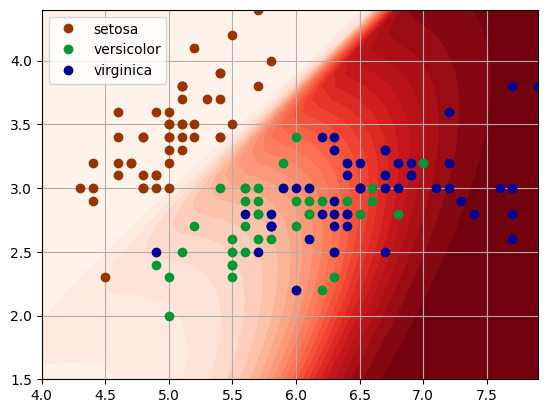

In [ ]:
# Probabilidad de clase 2:
zz = p2x.reshape(xx.shape)
levels = np.linspace(0, zz.max(), 25)

plt.figure()
plt.contourf(xx, yy, zz, levels=levels, cmap=plt.cm.Reds)
plt.plot(X[y==0,0], X[y==0,1], 'o', label=iris.target_names[0], color='#993300')
plt.plot(X[y==1,0], X[y==1,1], 'o', label=iris.target_names[1], color='#009933')
plt.plot(X[y==2,0], X[y==2,1], 'o', label=iris.target_names[2], color='#000099')

plt.legend(loc=2)

plt.grid(True)
plt.show()

### Ejercicios:

- Calcular el error de clasificación.
- ¿Qué pasa si aumentamos el número de componentes?
- Usar otro método, por ejemplo kernels, para estimar las densidades.